## In linear Regression, We discussed: Gradient Descent
### What is Gradient Descent??

Ref: https://www.ibm.com/cloud/learn/gradient-descent
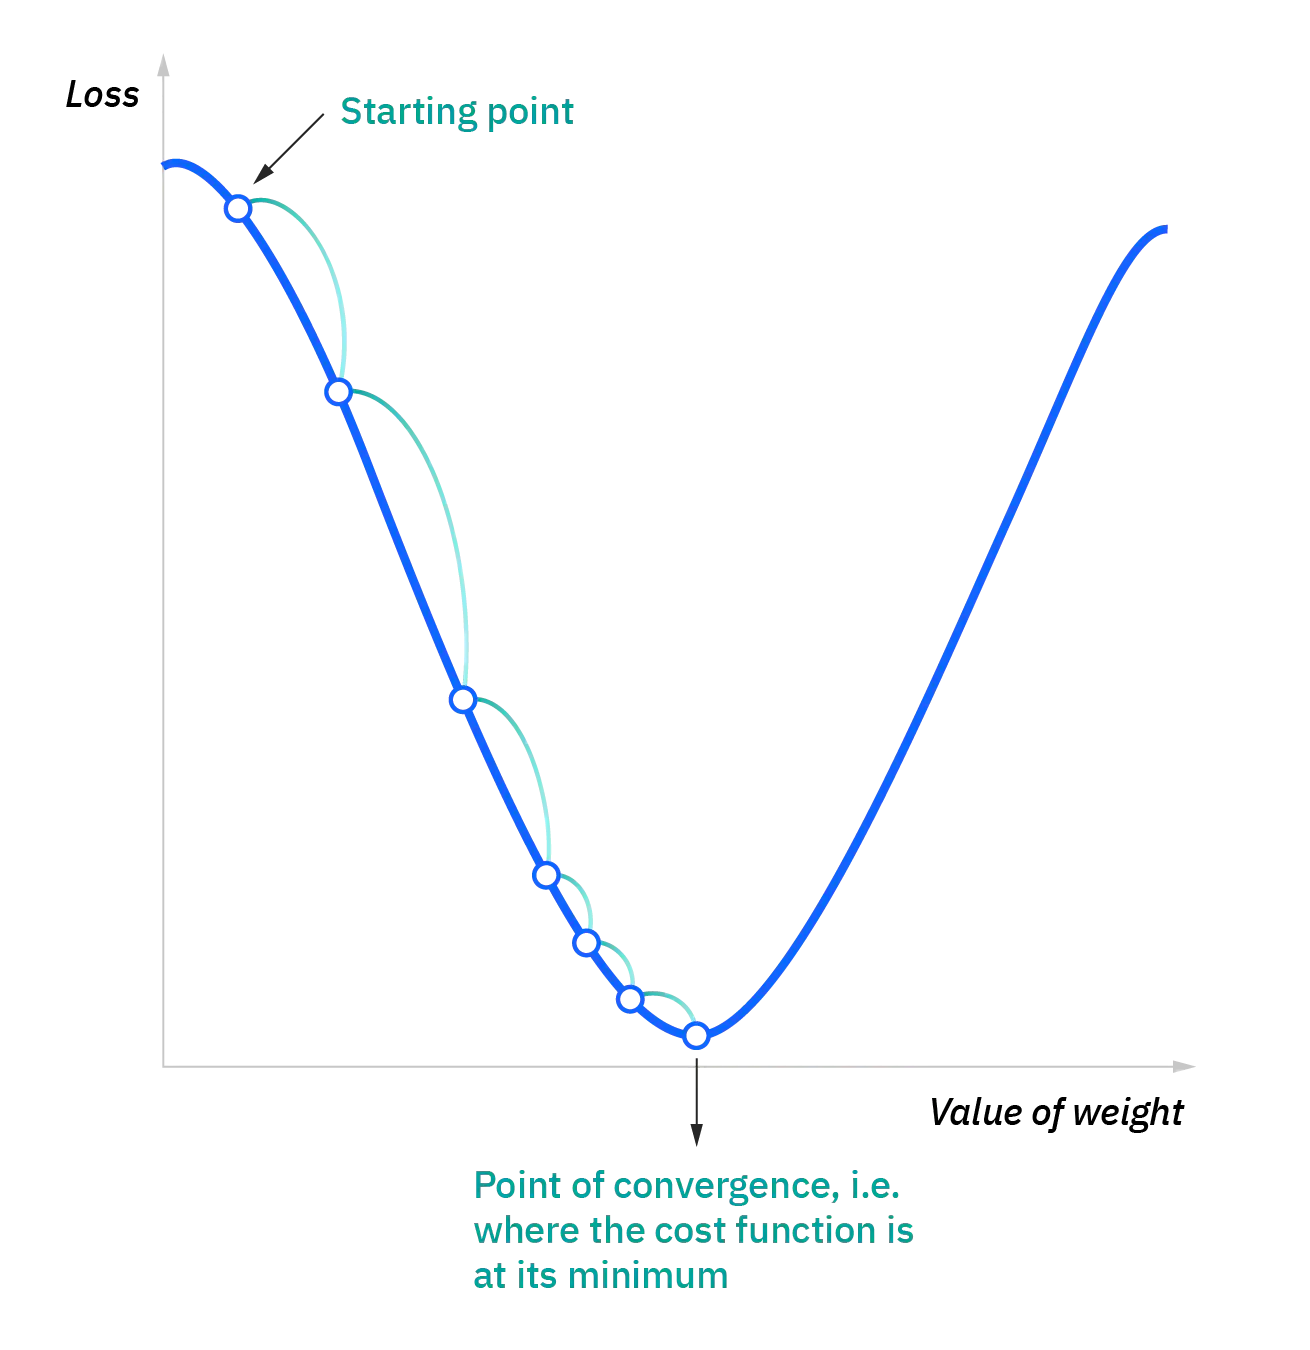 
Ref: https://towardsdatascience.com/deep-dive-into-supervised-learning-e7952c0692e9
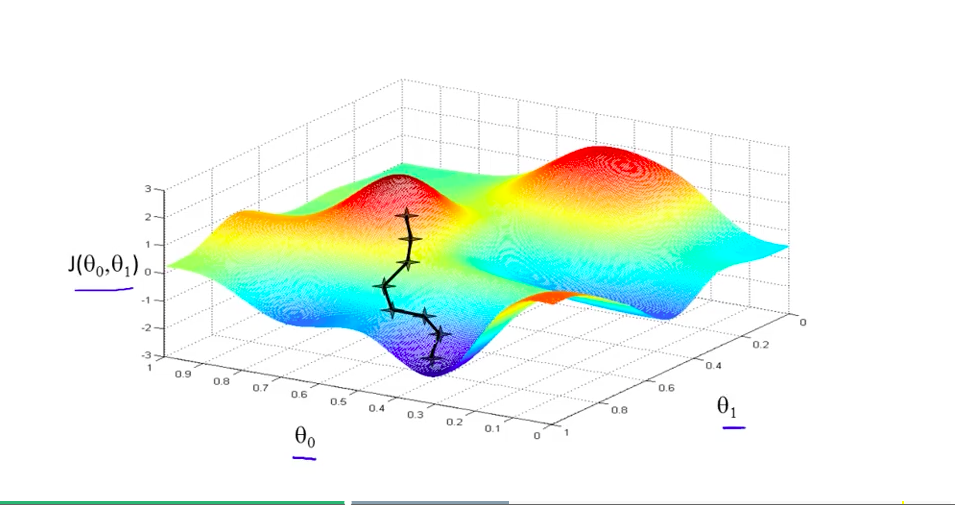 


### *So how does it work then?*

Ref: https://www.geeksforgeeks.org/gradient-descent-in-linear-regression/
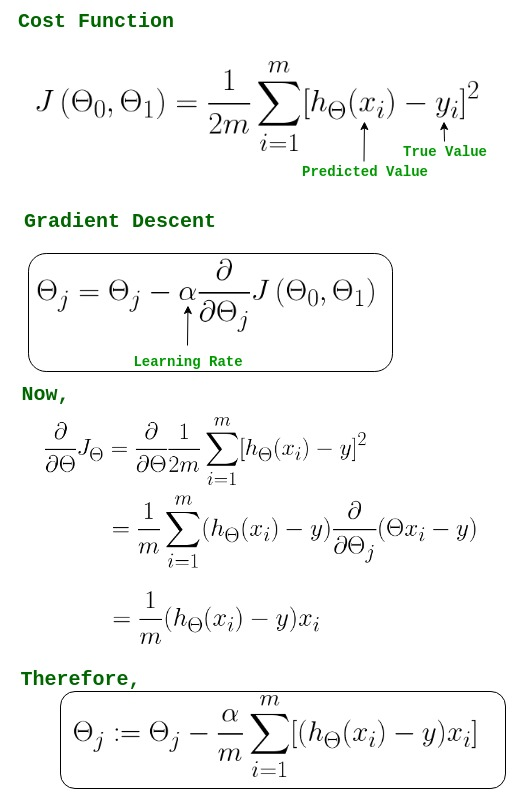


### Learning Rate
Ref: https://www.ibm.com/cloud/learn/gradient-descent
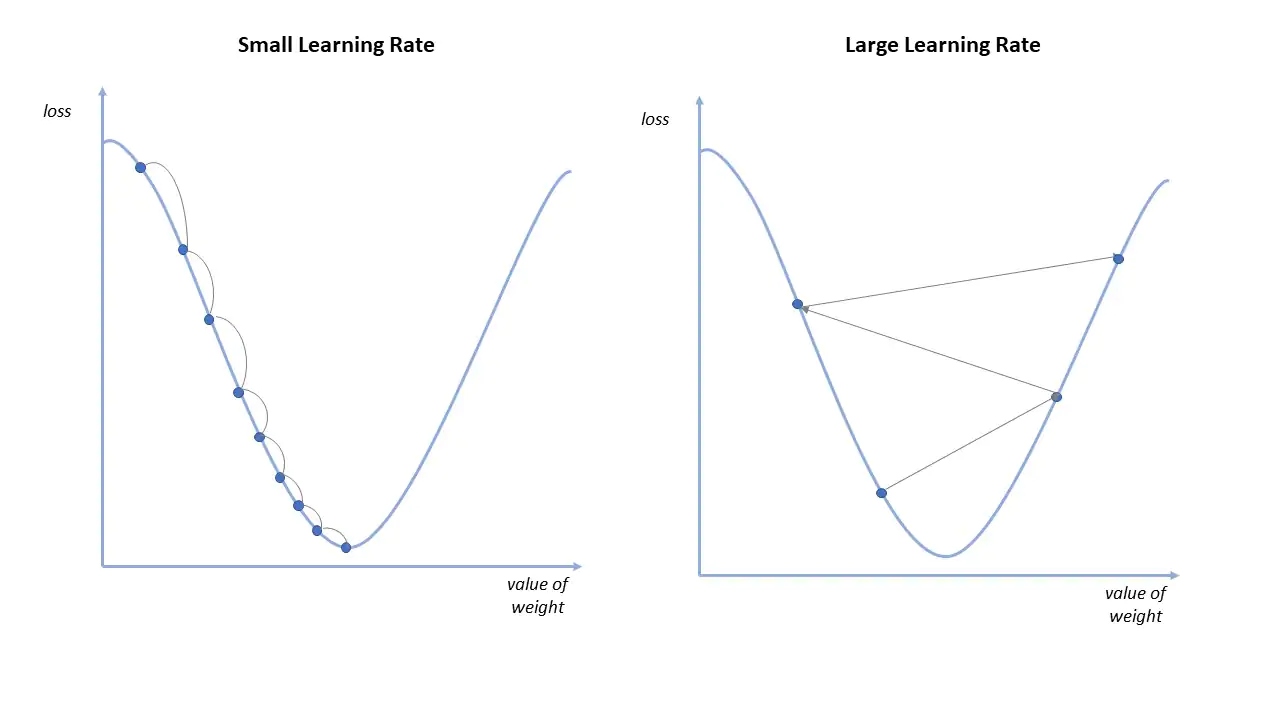



### So in linear regression?

![RegressionGif](Images/LR.gif)

### The cost (or loss) function
measures the difference, or error, between actual y and predicted y at its current position

### Doubt from last session: What is R square in linear regression? How is it used?
R² score or the _coefficient of determination_

- The proportion of the variance in the response variable (Y) that can be explained by the predictor variables (X) in the regression model.
- It can take any values between 0 to 1

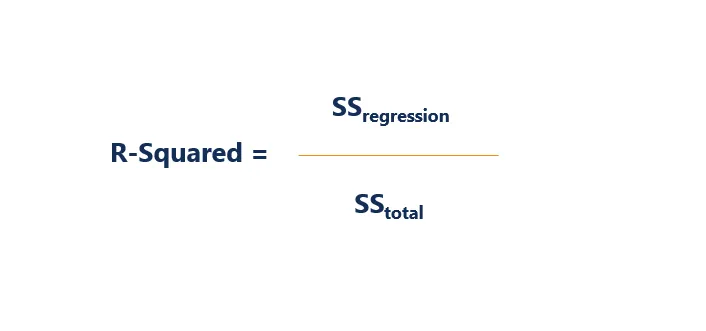
Ref: https://corporatefinanceinstitute.com/resources/knowledge/other/r-squared/

Here,
- SSregression is the sum of squares due to regression (explained residual sum of squares )
- SStotal is the total sum of squares

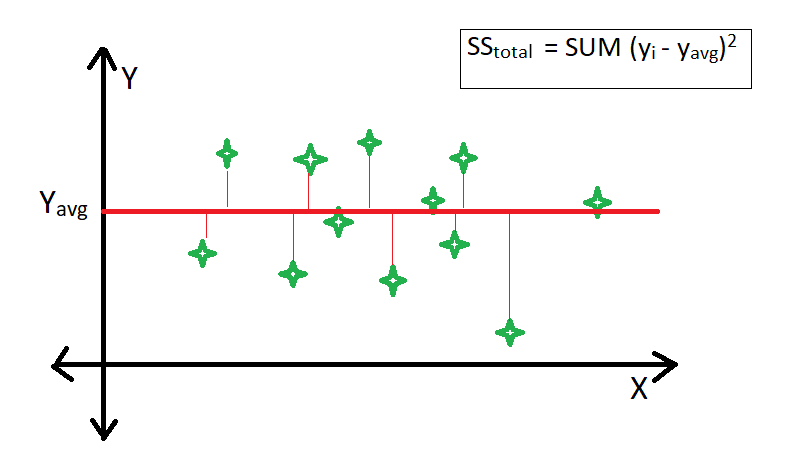
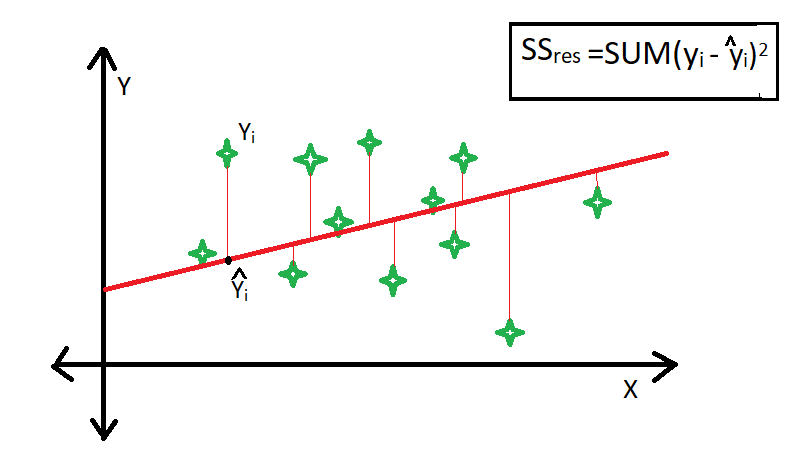
Ref: https://www.geeksforgeeks.org/ml-r-squared-in-regression-analysis/

This can be simplified into a formula:
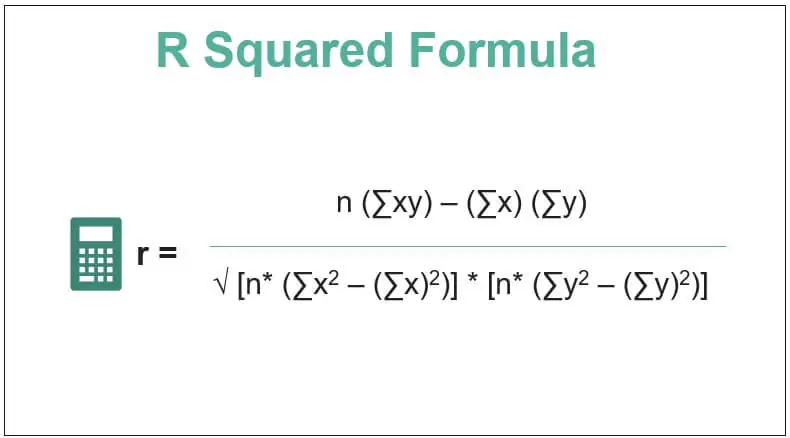
Ref: https://www.wallstreetmojo.com/r-squared-formula/

### If the test split is very bad, how will our model predict correctly then?

In [2]:
import numpy as np

In [3]:
from sklearn.model_selection import KFold
kf = KFold(n_splits = 5)
kf

KFold(n_splits=5, random_state=None, shuffle=False)

In [4]:
Dataset = [1,2,3,4,5,6,7,8,9,10]
for train_index, test_index in kf.split(Dataset):
    print(train_index, test_index)

[2 3 4 5 6 7 8 9] [0 1]
[0 1 4 5 6 7 8 9] [2 3]
[0 1 2 3 6 7 8 9] [4 5]
[0 1 2 3 4 5 8 9] [6 7]
[0 1 2 3 4 5 6 7] [8 9]


In [6]:
kf = KFold(n_splits = 5, shuffle= True)
for train_index, test_index in kf.split([1,2,3,4,5,6,7,8,9,10]):
    print(train_index, test_index)

[0 1 2 3 4 6 7 9] [5 8]
[0 1 3 4 5 6 7 8] [2 9]
[0 1 2 3 5 7 8 9] [4 6]
[0 2 4 5 6 7 8 9] [1 3]
[1 2 3 4 5 6 8 9] [0 7]


 **Stratified K-Fold:** this will help define our split using our classification category such that each fold has a considerably uniform division of data from all categories

In [7]:
from sklearn.model_selection import StratifiedKFold
folds = StratifiedKFold(n_splits=5)

In [8]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [9]:
from sklearn import datasets
iris = datasets.load_iris()

In [10]:
iris.target_names # Are the three types of irises present in the dataset

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [11]:
iris.data # The 4 values are Sepal Length, Sepal Width, Petal Length and Petal Width

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [12]:
def get_score(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    return model.score(X_test, y_test)

In [13]:
scores_lr =[]
scores_svm = []
scores_dt = []
scores_rf = []

In [14]:
for train_index, test_index in kf.split(iris.data):
    X_train, X_test, y_train, y_test = iris.data[train_index], iris.data[test_index], iris.target[train_index], iris.target[test_index]
    
    scores_lr.append(get_score(LogisticRegression(max_iter=500),X_train,X_test,y_train, y_test))
    scores_svm.append(get_score(SVC(),X_train,X_test,y_train, y_test))
    scores_dt.append(get_score(DecisionTreeClassifier(),X_train,X_test,y_train, y_test))
    scores_rf.append(get_score(RandomForestClassifier(),X_train,X_test,y_train, y_test))

In [15]:
scores_lr

[1.0, 0.9666666666666667, 0.9666666666666667, 1.0, 0.9]

In [16]:
print(np.mean(scores_lr))
print(np.mean(scores_svm))
print(np.mean(scores_dt))
print(np.mean(scores_rf))

0.9666666666666668
0.96
0.9533333333333335
0.9466666666666667


#### This is called as cross validation.
Read more here: https://learn.g2.com/cross-validation
To make the above hassle-free, scikit-learn has a predefined function called cross_val_score to do literally the same thing as above.

In [14]:
from sklearn.model_selection import cross_val_score
cross_val_score(LogisticRegression(max_iter=500),iris.data,iris.target,cv=5)

array([0.96666667, 1.        , 0.93333333, 0.96666667, 1.        ])

##### Things you should read up on
- Linear Regression
- Logistic Regression
- Decision Trees ( also checkout Random Forest too)
- Support Vector Machines (SVMs)

##### Things you can read up on:
Some basic terminology used in MLP and Deep learning:
- Types of losses
- Regularization functions
- Types of layers in deep learning (Dense, Convolution layers, Activation etc)
- Data cleaning and pre-processing